In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scienceplots
plt.style.use(["science","bright","grid"])

In [36]:
freq_vals   = [0.001,0.002,0.004,0.006,0.008,0.01,0.03,0.06,0.12,0.25,0.5,1.,2.,5.,6.,8.,10.,12.,15.,18.,23.,28.,36.,44.,55.,68.,86.,105.,133.]
ms          = ['o','s','P']
C_vals      = ["1e1","5e3","5e4"]
thd_out     = {C : np.load("data/thd_out_C_"+C+".npy") for C in C_vals}
thd_net     = {C : pd.DataFrame(np.load("data/thd_vals_C_"+C+".npy"),index=freq_vals) for C in C_vals}

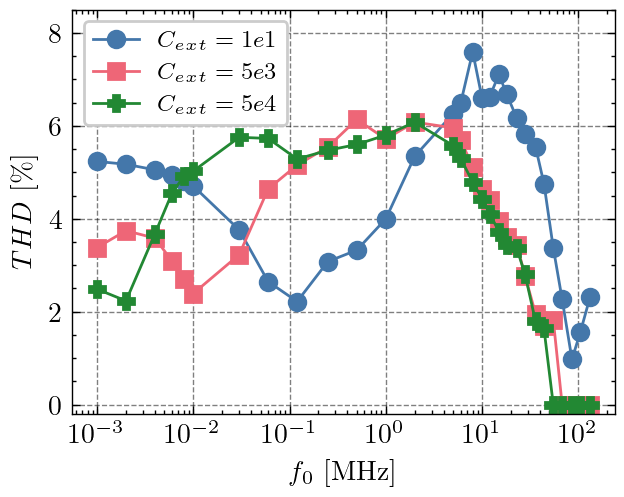

In [53]:
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
for i, C in enumerate(C_vals):
    ax.plot(freq_vals, thd_out[C], label='$C_{ext} = '+C+'$', marker=ms[i])
ax.set_ylabel('$THD$ [\%]')
ax.set_xlabel('$f_0$ [MHz]')
ax.legend(fontsize='small', loc='upper left')
ax.set_xscale('log')
ax.set_ylim(-0.2,8.5)
fig.savefig("plots/thd_output_vs_freq.svg", transparent=True)

In [47]:
df = pd.DataFrame()
for i, C in enumerate(C_vals):
    df_melted       = thd_net[C].reset_index().melt(id_vars='index')
    df_melted['C']  = C
    df              = pd.concat([df,df_melted]).reset_index(drop=True)
df

,index,variable,value,C
0,0.001,0,6.233037,1e1
1,0.002,0,6.188328,1e1
2,0.004,0,6.099409,1e1
3,0.006,0,6.018871,1e1
4,0.008,0,5.930957,1e1
...,...,...,...,...
7042,55.000,80,2.508340,5e4
7043,68.000,80,1.314505,5e4
7044,86.000,80,1.411823,5e4
7045,105.000,80,1.254536,5e4


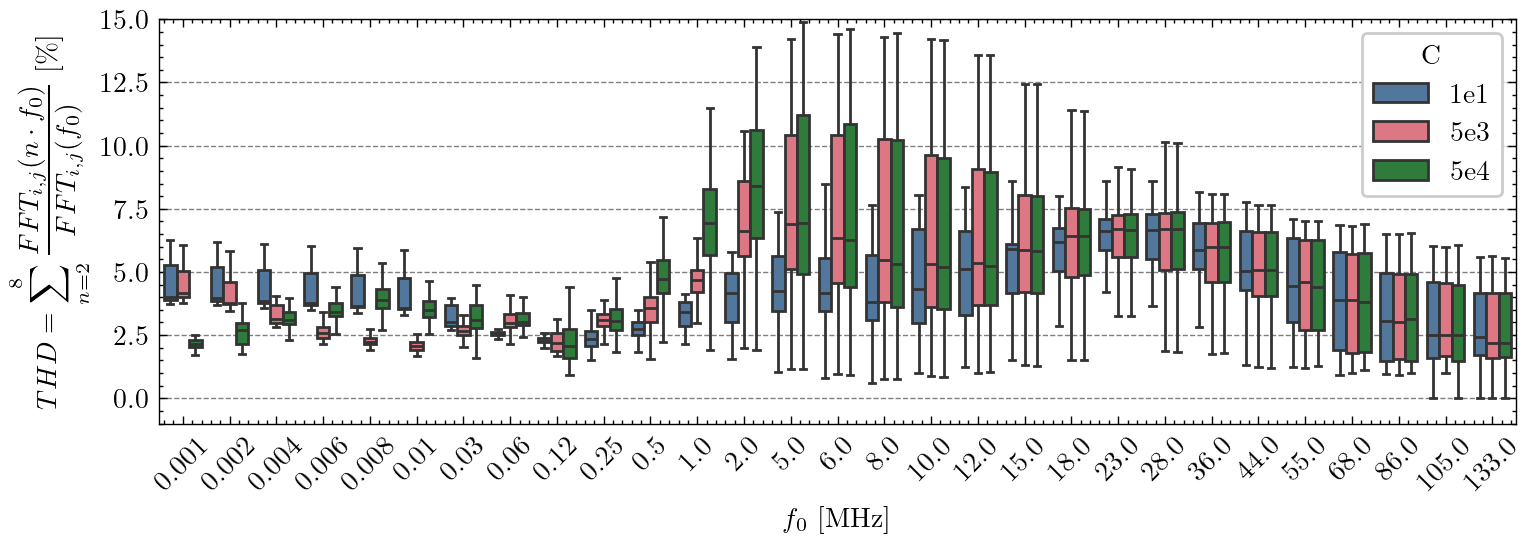

In [52]:
fig = plt.figure(dpi=200)
fig.set_figwidth(fig.get_figwidth()*2.5)
ax  = fig.add_subplot()
ax  = sns.boxplot(data=df, x='index', y='value', hue='C', fliersize=0)
ax.set_ylim(0,10)
ax.set_ylabel("$THD = \displaystyle\sum_{n=2}^{8}\\frac{FFT_{i,j}(n \cdot f_0)}{FFT_{i,j}(f_0)}$ [\%]")
ax.set_xlabel("$f_0$ [MHz]")
ax.set_ylim(-1,15)
_ = plt.xticks(rotation=45)
# fig.savefig("../plots/ac_input/2_electrodes/thd_dists_vs_freq.svg", transparent=True)

In [ ]:
df_metled = thd_net['1e1'].melt()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0.001,6.233037,5.419343,5.215571,5.160232,3.896646,5.158595,5.215064,5.418112,6.233650,5.475775,...,5.509227,6.245969,5.509988,5.262509,5.355385,5.233785,5.354689,5.263126,5.508972,6.244768
0.002,6.188328,5.349796,5.164099,5.096364,3.848750,5.099883,5.166672,5.350580,6.189826,5.400397,...,5.428486,6.186165,5.432329,5.202983,5.283671,5.172310,5.283951,5.202628,5.431685,6.186659
0.004,6.099409,5.215572,5.062524,4.987772,3.748898,4.983476,5.061829,5.218246,6.103494,5.266592,...,5.278134,6.067713,5.272376,5.078861,5.143628,5.052191,5.150792,5.081366,5.279799,6.070489
0.006,6.018871,5.086193,4.969053,4.873970,3.656141,4.873680,4.966275,5.085703,6.017408,5.126548,...,5.123313,5.959140,5.127422,4.960767,5.009852,4.933305,5.007859,4.964684,5.121359,5.959249
0.008,5.930957,4.946369,4.864430,4.756253,3.565336,4.762981,4.870417,4.958005,5.939574,4.976505,...,4.968665,5.855869,4.963120,4.850322,4.872391,4.819931,4.873667,4.850029,4.963492,5.856827
0.010,5.857836,4.835277,4.776346,4.659685,3.477635,4.660055,4.774618,4.839824,5.860252,4.854204,...,4.831569,5.751586,4.822728,4.732979,4.749757,4.704423,4.747117,4.734098,4.822198,5.753899
0.030,5.252949,3.710405,3.936812,3.746771,2.755031,3.739966,3.923215,3.701988,5.235058,3.654827,...,3.562066,5.075618,3.550732,3.841857,3.630717,3.760954,3.637921,3.842525,3.550196,5.078678
0.060,4.476832,2.663979,2.949676,2.888190,2.362680,2.883478,2.907955,2.667708,4.451181,2.554899,...,2.542716,4.316739,2.505511,2.846332,2.562745,2.646722,2.578968,2.846387,2.522867,4.319023
0.120,3.407260,2.271095,1.943505,1.896682,2.052780,1.900808,1.968460,2.270746,3.393832,2.310051,...,2.289497,3.278260,2.301074,2.356105,1.857753,2.217810,1.809970,2.377033,2.299255,3.272842
0.250,2.716153,2.769368,1.624689,1.551946,1.495045,1.552469,1.647917,2.789588,2.674515,2.826586,...,2.422305,3.510831,2.467263,3.072078,2.064163,3.077863,2.079394,3.045558,2.436991,3.474473
